In [189]:
import subprocess
import numpy as np
import re 
import copy 
import matplotlib.pyplot as plt

In [190]:
start = 0.05
end = 4.1
step_size = 0.2
num_values = int((end - start) / step_size) + 1
velocities = np.linspace(start, end, num_values) 
print(velocities)
input_file = 'in.dat'
code_executable = './fd.x'

[0.05   0.2525 0.455  0.6575 0.86   1.0625 1.265  1.4675 1.67   1.8725
 2.075  2.2775 2.48   2.6825 2.885  3.0875 3.29   3.4925 3.695  3.8975
 4.1   ]


In [191]:
def update_time(line, velocity):
    time = 150 / velocity 
    values = line.strip().split(' ') #splitting line by space
    values[2] = f"{time}d0" # last value which is velocity
    return ' '.join(values) + '\n' # putting vals back in line

In [192]:
# Function to update the parameter value on the line
def update_velocity(line, new_value):
    values = line.strip().split(' ') #splitting line by space
    values[-1] = f"{new_value}d0" # last value which is velocity
    return ' '.join(values) + '\n' # putting vals back in line 

In [193]:
def get_coefs():
    for velocity in velocities: 
        with open(input_file, 'r') as file:
            lines = file.readlines()  # read file
        
        lines[1] = update_time(lines[1], velocity) # update time 
        lines[7] = update_velocity(lines[7], velocity) # update velocity 

        with open(input_file, 'w') as file:
            file.writelines(lines) # update file  

        with open(input_file, 'r') as f:
            result = subprocess.run([code_executable], stdin=f, capture_output=True, text=True, check=True)
        
        stdout_lines = result.stdout.split('\n')
        coefs = stdout_lines[-2]
        coefs_split = coefs.split(' ')

        RandT = [f'{velocity}', ]

        for x in coefs_split:
            try:
                float_value = float(x)
                RandT.append(float_value)
            except ValueError:
                pass

        yield RandT

In [194]:
coefs_list = []

for RandT in get_coefs():
    print(RandT)
    coefs_list.append(RandT)

['0.05', 0.8223541423838215, 0.17717563793227184]
['0.2525', 0.10994884643865366, 0.8897318909763335]
['0.45499999999999996', 0.0021389867009792844, 0.9976138358593527]
['0.6575', 0.017710090472860703, 0.982109295702607]
['0.86', 0.051796628136961315, 0.9480687449007918]
['1.0625', 0.07837786267165577, 0.9215560982240452]
['1.265', 0.08990114258270278, 0.9100664860337702]
['1.4675', 0.08603201560028832, 0.9139345694985176]
['1.67', 0.07023057915685203, 0.9297586531401976]
['1.8724999999999998', 0.04820642586677501, 0.9517898859298648]
['2.0749999999999997', 0.026397789232990583, 0.9735901728938053]
['2.2775', 0.0100924239786363, 0.9899158186194342]
['2.4799999999999995', 0.0016769392838286768, 0.9983134895781849]
['2.6824999999999997', 0.00019878699720849008, 0.9998065502738364]
['2.885', 0.002580158487230782, 0.9974169334347005]
['3.0874999999999995', 0.0055379292872103775, 0.9944639196870354]
['3.2899999999999996', 0.006926268716612081, 0.9930707652725916]
['3.4924999999999997', 0.00

In [195]:
refl = []
trans = []

for i in coefs_list:
    refl.append(i[1])
    trans.append(i[2])


In [196]:
def analytical():
    V0 = 1
    R0 = 1
    E = np.square(velocities) 

    first_term = V0**2 * np.sin(2 * R0 * np.sqrt(2 * (E + V0)))**2
    second_term = (4 * E * (E + V0)) + first_term

    analytical_refl = first_term / second_term
    analytical_trans = 1 - analytical_refl

    return(analytical_refl, analytical_trans)


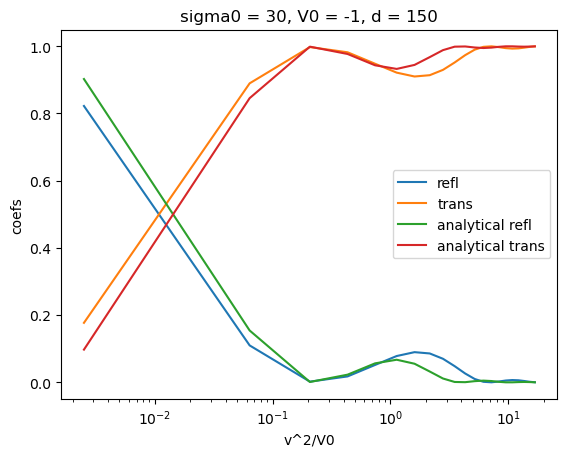

In [197]:
analytical_refl, analytical_trans = analytical()

plt.plot(np.square(velocities), refl, label = 'refl')
plt.plot(np.square(velocities), trans, label = 'trans')
plt.plot(np.square(velocities), analytical_refl, label = 'analytical refl')
plt.plot(np.square(velocities), analytical_trans, label = 'analytical trans')
plt.xlabel('v^2/V0')
plt.ylabel('coefs')
plt.title('sigma0 = 30, V0 = -1, d = 150')
plt.xscale('log')
plt.legend()
plt.show()
